In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
oils=pd.read_csv('oil.csv')
#oils=oils.set_index('date')

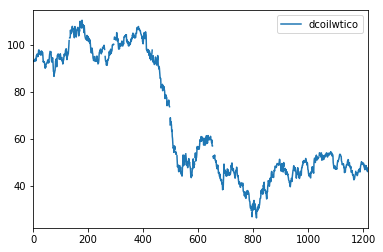

In [4]:
plt.close('all')
oils.plot()
plt.show()

In [5]:
oils['date'] =  pd.to_datetime(oils['date'], format='%Y/%m/%d')
oils.set_index('date', inplace=True)
oils = oils.resample('D').mean().reset_index()
oils=oils.interpolate(method='linear').bfill().ffill()

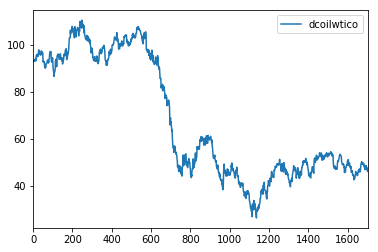

In [6]:
oils.plot()
plt.show()

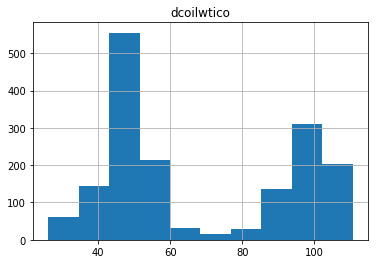

In [7]:
oils.hist()
plt.show()

In [8]:
holidays=pd.read_csv('holidays_events.csv')
holidays['date'] =  pd.to_datetime(holidays['date'], format='%Y/%m/%d')
holidays=holidays.drop_duplicates(subset=['date'],keep=False)
holidays=holidays.reset_index()
del holidays['index']

In [9]:
stores=pd.read_csv('stores.csv')

In [10]:
items=pd.read_csv('items.csv')

In [31]:
transactions=pd.read_csv('transactions_clean.csv')
transactions['date'] =  pd.to_datetime(transactions['date'], format='%Y/%m/%d')

In [35]:
# Transactions made on holidays
trans=transactions.melt(id_vars='date')
trans=trans.rename(columns={'variable':'store_nbr'})
trans['store_nbr']=trans['store_nbr'].astype(int)
trans=trans.merge(stores, on='store_nbr',how='left')

,date,store_nbr,value,city,state,type,cluster
0,2013-01-01,1,2111.0,Quito,Pichincha,D,13
1,2013-01-02,1,2111.0,Quito,Pichincha,D,13
2,2013-01-03,1,1833.0,Quito,Pichincha,D,13
3,2013-01-04,1,1863.0,Quito,Pichincha,D,13
4,2013-01-05,1,1509.0,Quito,Pichincha,D,13


In [59]:
def isAHoliday(date,city,state):
    for index,rows in holidays.iterrows():
        if(rows['locale']=='National' and rows['date']==date):
            return 1
        elif(rows['date']==date and rows['locale_name']==city):
            return 1
        elif(rows['date']==date and rows['locale_name']==state):
            return 1
        else:
            return 0

In [60]:
trans['Holidays']=trans.apply(lambda x:isAHoliday(x['date'],x['city'],x['state']),axis=1)

In [61]:
trans.groupby(['store_nbr'])['Holidays'].value_counts()

store_nbr  Holidays
1          0           1688
2          0           1688
3          0           1688
4          0           1688
5          0           1688
6          0           1688
7          0           1688
8          0           1688
9          0           1688
10         0           1688
11         0           1688
12         0           1688
13         0           1688
14         0           1688
15         0           1688
16         0           1688
17         0           1688
18         0           1688
19         0           1688
20         0           1688
21         0           1688
22         0           1688
23         0           1688
24         0           1688
25         0           1688
26         0           1688
27         0           1688
28         0           1688
29         0           1688
30         0           1688
31         0           1688
32         0           1688
33         0           1688
34         0           1688
35         0           1688


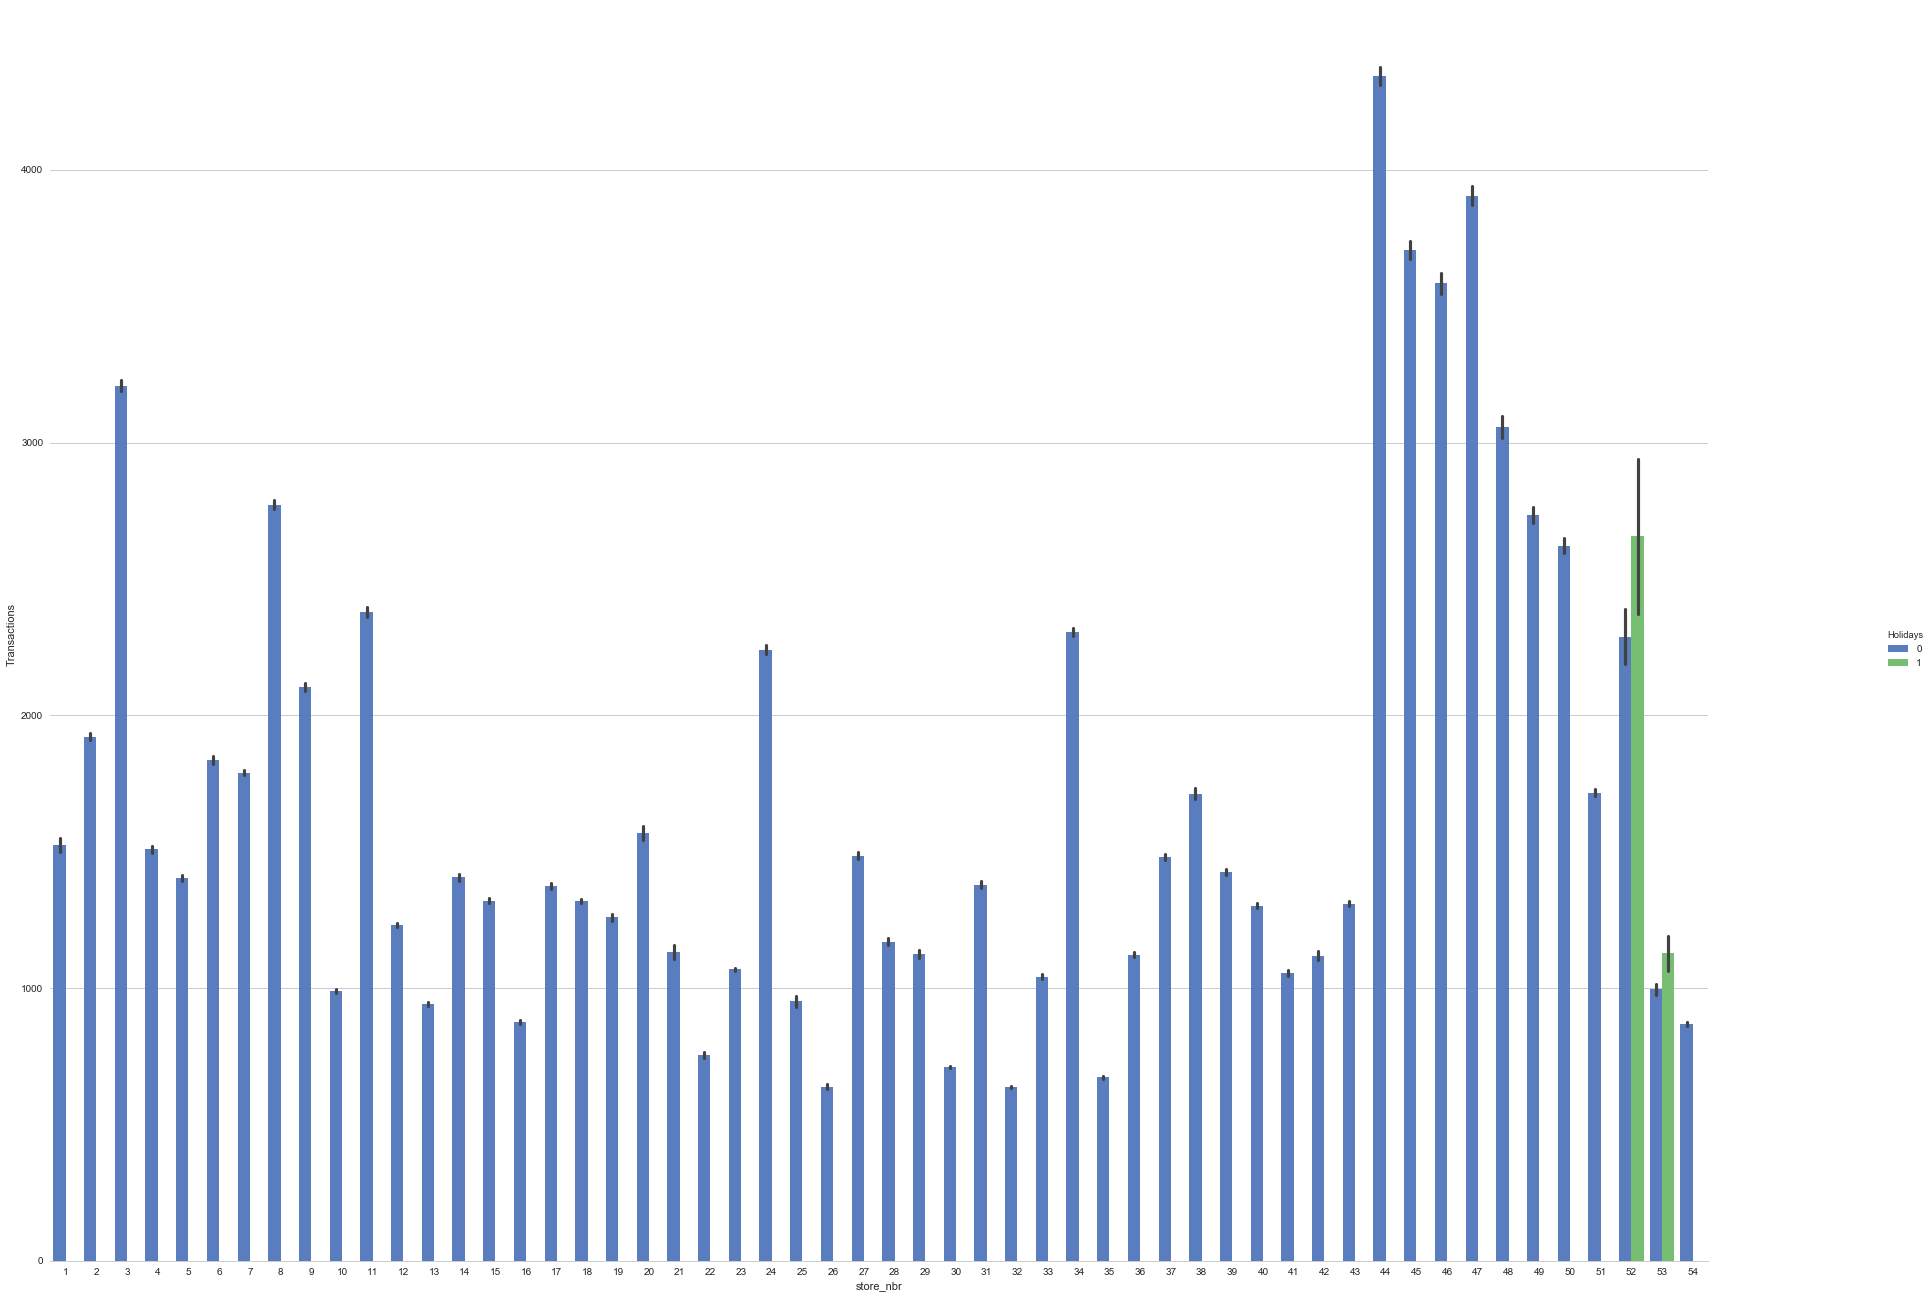

In [51]:
#transaction on Holidays
import seaborn as sns
plt.close('all')
sns.set(style="whitegrid")
g = sns.factorplot(x="store_nbr", y="value", hue="Holidays", data=trans,
                   size=6, kind="bar", palette="muted")
g.fig.set_size_inches(30,20)
g.despine(left=True)
g.set_ylabels("Transactions")
plt.show()

In [ ]:
pl

In [44]:
trainSample=pd.read_csv("train_SampleForEDA.csv")

In [45]:
trainSample.dtypes

id                 int64
date              object
store_nbr          int64
item_nbr           int64
unit_sales       float64
onpromotion         bool
family            object
class              int64
perishable         int64
city              object
state             object
type              object
cluster            int64
dcoilwtico       float64
holidaytype_n     object
locale_n          object
locale_name       object
description_n     object
transferred_n     object
holidaytype_r     object
locale_r          object
description_r     object
transferred_r     object
holidaytype       object
locale            object
description       object
transferred       object
day                int64
month              int64
year               int64
transactions     float64
dtype: object